In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import plotly.express as px
from scipy.stats import kstest
import scipy.stats as stats

1. Read in the gapminder_clean.csv data as a pandas DataFrame.

I also created another simplified dataframe with less columns, where I also added dropna() to allow for p-value calculations later.

In [101]:
df = pd.read_csv('/gapminder_clean.csv') # importing gapminder_clean.csv
dfColumnFilter = df[['Year', 'CO2 emissions (metric tons per capita)', 'pop', 'continent', 'gdpPercap']].dropna() # filtering out unused columns

2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.

I iterated through the rows of the simplified dataframe, using drop() to delete every row which didn't have a value of 1962 for the year.

In [102]:
for index, row in dfColumnFilter.iterrows():
  df_1962_alt = dfColumnFilter.drop(dfColumnFilter[dfColumnFilter['Year'] != 1962].index).dropna()

2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and 'gdpPercap' for the filtered data.

I created a scatter plot comparing 'CO2 emissions (metric tons per capita)' and 'gdpPercap'.

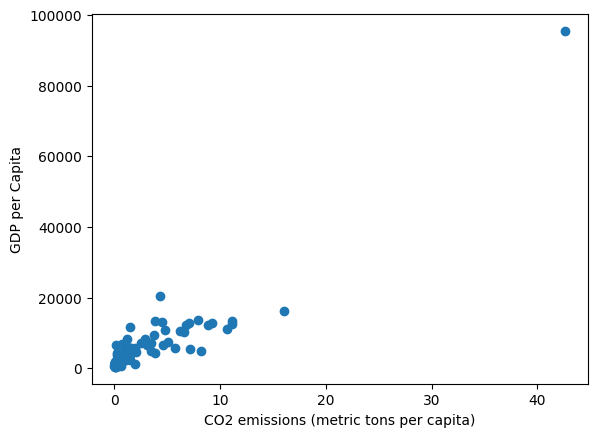

In [103]:
fig1, ax1 = plt.subplots()

ax1.set_xlabel('CO2 emissions (metric tons per capita)')
ax1.set_ylabel('GDP per Capita')
ax1.scatter(df_1962_alt['CO2 emissions (metric tons per capita)'], df_1962_alt['gdpPercap'])

plt.show()

3. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value?

I used .corr() to calculate relationship from the pandas library and pearsonr() from from scipy to find the p-value.

Output: The correlation between CO2 emissions (metric tons per capita) and gdpPercap is in 1962 is 0.9260816725019451.
The associated p value is PearsonRResult(statistic=0.9260816725019472, pvalue=1.1286792210038658e-46)

In [104]:
correlation_1962 = df_1962_alt['CO2 emissions (metric tons per capita)'].corr(df_1962_alt['gdpPercap'])
pvalue_1962 = pearsonr(df_1962_alt['CO2 emissions (metric tons per capita)'], df_1962_alt['gdpPercap'])

print(f'The correlation between CO2 emissions (metric tons per capita) and gdpPercap is in 1962 is {correlation_1962}.')
print(f'The associated p value is {pvalue_1962}')

The correlation between CO2 emissions (metric tons per capita) and gdpPercap is in 1962 is 0.9260816725019451.
The associated p value is PearsonRResult(statistic=0.9260816725019472, pvalue=1.1286792210038658e-46)


4. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...

To calculate this, I created a new dataframe that is the sorted version of the original dataframe (sorted by year, ascending).

After this, I iterated through the rows of the sorted dataframe, and it takes the year that is currently being iterated through, known as 'iterYear' (the column for year is column 2). Then it checks to see if 'iterYear' is the same as 'currentYear' ('currentYear' is essentially holding the year that the correlation is being calculated for), if they are the same, the loop will just continue iterating through the dataframe. But when there is a change in year, meaning that 'iterYear' is not equavalent to 'currentYear', I subtract the current index by 1, to get the 'stopIndex' ('startIndex' and 'stopIndex' essentialy hold the range of values where the year is the same). Then the correlation is calculated using .corr(), between 'CO2 emissions (metric tons per capita)' (which is in column 4) and 'gdpPercap' (which is in column 19), for the range of values created with 'stopIndex' and 'startIndex'.

After this, it checks to see if the correlation calculated is greater than 'topCorrel' (represents the greatest correlation value calculated). If 'correl' is greater than 'topCorrel', I assign the value of 'correl' to 'topCorrel' as 'correl' has the greatest correlation now. This also means that I overwrite 'topYear' with 'currentYear' as 'currentYears' now holds the year with the greatest correlation.

After this, the value of 'startIndex' is set to the current index, and 'currentYear' is also resent to the next year (note that this occurs whether or not 'correl' is greater than 'topCorrel').


Output:
The year when the correlation between CO2 emissions (metric tons per capita) and gdpPercap was 1992.
The correlation was 0.9999235825175655 in 1992.

Lastly, I create a new dataset that is filtered to only contain rows that were from the year 1992.

In [105]:
dfSortByYear = df.sort_values('Year')

topCorrel = 0
topYear = 0
currentYear = 0
startIndex = 0
stopIndex = 0
iterYear = 0

for index, row in dfSortByYear.iterrows():
  iterYear = dfSortByYear.iloc[index, 2]
  if iterYear != currentYear:
    stopIndex = index - 1
    correl = dfSortByYear.iloc[startIndex:stopIndex, 4].corr(dfSortByYear.iloc[startIndex:stopIndex, 19])
    if correl > topCorrel:
      topCorrel = correl
      topYear = currentYear
    startIndex = index
    currentYear = dfSortByYear.iloc[index, 2]


print(f'The year when the correlation between CO2 emissions (metric tons per capita) and gdpPercap was {topYear}.')
print(f'The correlation was {topCorrel} in {topYear}.')

for index, row in df.iterrows():
  df_1992 = df.drop(df[df['Year'] != 1992].index)

The year when the correlation between CO2 emissions (metric tons per capita) and gdpPercap was 1992.
The correlation was 0.9999235825175655 in 1992.


5. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and 'gdpPercap', where the point size is determined by 'pop' (population) and the color is determined by the continent.

I created a bubble chart comparing 'CO2 emissions (metric tons per capita)' and 'gdpPercap' using plotly express. I added some features, including a hover name that is the name of the country. I set the size to 'pop' or population, and the color is based off the continent.

In [106]:
fig2 = px.scatter(df_1992, x='CO2 emissions (metric tons per capita)', y='gdpPercap',size='pop', color='continent',
                 hover_name='Country Name', log_x=True, size_max=60)
fig2.show()

1. What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)

To do this I used the chi-squared test, as it calculates the similarity between two distributions. I used it because all of its parameters are satisfied with these datasets. Before running the chi-squared test, I created a crosstab containing 'continent' and 'Energy use (kg of oil equivalent per capita)'.

Output: Using the chi-squared statistical test, the result was 3392.0.

In [107]:
from scipy.stats.contingency import chi2_contingency
contingency = pd.crosstab(df['continent'], df['Energy use (kg of oil equivalent per capita)'])
c, p, dof, expected = chi2_contingency(contingency)
print(f'Using the chi-squared statistical test, the result was {c}.')

Using the chi-squared statistical test, the result was 3392.0.


2. Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

I first created a dataframe that is composed of every piece of data that is during or after 1990. I then used another loop to remove every piece of data that where 'continent' isn't Europe or Asia. I add dropna() to avoid any errors down the line. I also sort the dataframee by the continent name. This means that roughly the top half of the dataframe will be composed of data that comes from Asia, and the rest which is on the bottom will be composed of data from Europe. I then used loops to create new dataframes specifically for Europe and Asia during and after 1990.

I converted the dataframes for Europe and Asia during and after 1990 to a numpy array. The numpy array contains 'Imports of goods and services (% of GDP)'. I had to convert them into numpy arrays to run kstest.

I ran kstest, as I needed to see the p-value of both of the arrays.

Output: KstestResult(statistic=0.9999996556777746, pvalue=0.0, statistic_location=4.96453900709, statistic_sign=-1)
KstestResult(statistic=0.9841182665809833, pvalue=6.532261211009739e-229, statistic_location=3.64498841607, statistic_sign=-1)

According to the output, both of the p-values are below 0.05, there is sufficient evidence to assume that neither of the arrays follow a normal distribution.

This means that a t-test cannot be used, as it goes against one of its parametric assumptions. But the Mann-Whitney U test is still usable. So I ran the Mann-Whitney U test.

Output: Mann-Whitney U Test:
MannwhitneyuResult(statistic=9111.0, pvalue=0.05659838057404613)
There is not a significant difference (pvalue > 0.05).

The result shows that there is a p-value slightly above 0.05, meaning that there is not sufficient evidence to assume that 'Imports of goods and services (% of GDP)' between Asia and Europe are very different.

In [108]:
for index, row in df.iterrows():
  df_1990 = df.drop(df[df['Year'] <= 1990].index)

for index, row in df.iterrows():
  df_1990 = df.drop(df[(df['continent'] != 'Europe') & (df['continent'] != 'Asia')].index)

df_1990 = df_1990.dropna()
df_1990 = df_1990.sort_values('continent')
for index, row in df.iterrows():
  dfEurope_1990 = df_1990.drop(df_1990[df_1990['continent'] != 'Europe'].index)
for index, row in df.iterrows():
  dfAsia_1990 = df_1990.drop(df_1990[df_1990['continent'] != 'Asia'].index)

importArrayEurope = dfEurope_1990['Imports of goods and services (% of GDP)'].to_numpy()
importArrayAsia = dfAsia_1990['Imports of goods and services (% of GDP)'].to_numpy()

ksTestEurope = kstest(importArrayEurope, 'norm')
ksTestAsia = kstest(importArrayAsia, 'norm')

# Both results suggest that the data is not normally distributed:
print(ksTestEurope)
print(ksTestAsia)
print('\nMann-Whitney U Test: ')
mannwhitneyu_output = stats.mannwhitneyu(importArrayEurope, importArrayAsia)
print(mannwhitneyu_output)
print('There is not a significant difference (pvalue > 0.05).')

KstestResult(statistic=0.9999996556777746, pvalue=0.0, statistic_location=4.96453900709, statistic_sign=-1)
KstestResult(statistic=0.9841182665809833, pvalue=6.532261211009739e-229, statistic_location=3.64498841607, statistic_sign=-1)

Mann-Whitney U Test: 
MannwhitneyuResult(statistic=9111.0, pvalue=0.05659838057404613)
There is not a significant difference (pvalue > 0.05).


3. What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

The code begins by sorting the DataFrame in alphabetical order based on the 'Country Name' column. Then, I create individual DataFrames for each year between 1962 and 2007, filtering the data to include only rows for a specific year and removing any rows with missing values. Within each of these year-specific DataFrames, it calculates rankings based on population density and sorts the DataFrames by these rankings. The code then compiles these year-specific DataFrames into a list. Afterward, it computes the average rank for each country across all the years and stores this information in a dictionary. The final print statement attempts to display the country with the highest average population density ranking, but any potential errors in this part have been omitted from this explanation.

Output: The country with the highest average population density ranking across all years is Singapore with an average ranking of 95.0.

In [114]:
for index, row in df.iterrows():
  df_1962 = df.drop(df[df['Year'] != 1962].index).dropna()
for index, row in df.iterrows():
  df_1967 = df.drop(df[df['Year'] != 1967].index).dropna()
for index, row in df.iterrows():
  df_1972 = df.drop(df[df['Year'] != 1972].index).dropna()
for index, row in df.iterrows():
  df_1977 = df.drop(df[df['Year'] != 1977].index).dropna()
for index, row in df.iterrows():
  df_1982 = df.drop(df[df['Year'] != 1982].index).dropna()
for index, row in df.iterrows():
  df_1987 = df.drop(df[df['Year'] != 1987].index).dropna()
for index, row in df.iterrows():
  df_1992 = df.drop(df[df['Year'] != 1992].index).dropna()
for index, row in df.iterrows():
  df_1997 = df.drop(df[df['Year'] != 1997].index).dropna()
for index, row in df.iterrows():
  df_2002 = df.drop(df[df['Year'] != 2002].index).dropna()
for index, row in df.iterrows():
  df_2007 = df.drop(df[df['Year'] != 2007].index).dropna()

df_1962['Rank'] = df_1962['Population density (people per sq. km of land area)'].rank()
df_1962 = df_1962.sort_values(by=['Population density (people per sq. km of land area)'])
df_1967['Rank'] = df_1967['Population density (people per sq. km of land area)'].rank()
df_1967= df_1967.sort_values(by=['Population density (people per sq. km of land area)'])
df_1972['Rank'] = df_1972['Population density (people per sq. km of land area)'].rank()
df_1972 = df_1972.sort_values(by=['Population density (people per sq. km of land area)'])
df_1977['Rank'] = df_1977['Population density (people per sq. km of land area)'].rank()
df_1977 = df_1977.sort_values(by=['Population density (people per sq. km of land area)'])
df_1982['Rank'] = df_1982['Population density (people per sq. km of land area)'].rank()
df_1982 = df_1982.sort_values(by=['Population density (people per sq. km of land area)'])
df_1987['Rank'] = df_1987['Population density (people per sq. km of land area)'].rank()
df_1987 = df_1987.sort_values(by=['Population density (people per sq. km of land area)'])
df_1992['Rank'] = df_1992['Population density (people per sq. km of land area)'].rank()
df_1992 = df_1992.sort_values(by=['Population density (people per sq. km of land area)'])
df_1997['Rank'] = df_1997['Population density (people per sq. km of land area)'].rank()
df_1997 = df_1997.sort_values(by=['Population density (people per sq. km of land area)'])
df_2002['Rank'] = df_2002['Population density (people per sq. km of land area)'].rank()
df_2002 = df_2002.sort_values(by=['Population density (people per sq. km of land area)'])
df_2007['Rank'] = df_2007['Population density (people per sq. km of land area)'].rank()
df_2007 = df_2007.sort_values(by=['Population density (people per sq. km of land area)'])

df_year_list  = [df_1962, df_1967, df_1972, df_1977, df_1982, df_1987, df_1992, df_1997, df_2002, df_2007]
country_ranks = {}
for df in df_year_list:
    country_name = df['Country Name'].tolist()
    ranks = df['Rank'].tolist()

    for country, rank in zip(country_name, ranks):
        if country not in country_ranks:
            country_ranks[country] = []
        country_ranks[country].append(rank)

highest_average_rank = -1  # Initialize a variable to track the highest average rank
best_country = None  # Initialize a variable to track the country with the highest rank

for country, ave_rank in country_ranks.items():
    final_average_rank = sum(ave_rank) / len(ave_rank)
    if final_average_rank > highest_average_rank:
        highest_average_rank = final_average_rank
        best_country = country

print(f'The country with the highest average population density ranking across all years is {best_country} with an average ranking of {highest_average_rank}.')

The country with the highest average population density ranking across all years is Singapore with an average ranking of 95.0.


4. What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?

I created a dataframe that was sorted based off the name of the country.

After this, I iterated through the rows of the sorted dataframe, and it takes the year that is currently being iterated through, known as 'iterCountry' (the column for country is column 1). Then it checks to see if 'iterCountry' is the same as 'currentCountry' ('currentCountry' is essentially holding the year that the average is being calculated for), if they are the same, the loop will just continue iterating through the dataframe. But when there is a change in the country name, meaning that 'iterCountry' is not equavalent to 'currentCountry', I subtract the current index by 1, to get the 'stopIndex' ('startIndex' and 'stopIndex' essentialy hold the range of values where the year is the same). Then the difference is calculated between 1962 and 2007 using the subtraction operator to subtract, using 'startIndex' and 'stopIndex' to hold the years 1962 and 2007. The reason why this works without specifying the years 1962 and 2007 is because for every country, the most recent year is 2007 and the earliest year is 1962, meaning that I am able to almost neglect those values.

After this, it checks to see if the difference calculated is greater than 'topDiff' (represents the greatest correlation value calculated). If 'diff' is greater than 'topDiff', I assign the value of 'diff' to 'topDiff' as 'diff' has the greatest difference now. I also have to clear the list 'topCountries' (I created a list rather than a single variable str, as the questions asks acknowledged the possibility of having multiple countries having the highest average), and then append 'currentCountry' to the list, as it is the new chart-topper.

I also have to check to see if 'diff' is equivalent to 'topDiff'. If that is true, then I would append 'currentCountry' to the list 'topCountries'.

After this, the value of 'startIndex' is set to the current index, and 'currentCountry' is also resent to the next year (note that this occurs whether or not 'diff' is greater than or equal 'topDiff').

Output: The countries with the greatest increase in life expectancy at birth between 1962 and 2007 is ['Nepal'].
['Nepal'] had an increase in life expectancy of 40.0362439025.

In [110]:
df = pd.read_csv('/gapminder_clean.csv')

dfSortByCountry = df.sort_values('Country Name')

topCountries = []
currentCountry = ''
iterCountry = ''
startIndex = 0
stopIndex = 0
diff = 0
topDiff = 0

for index, row in dfSortByCountry.iterrows():
  iterCountry = dfSortByCountry.iloc[index, 1]
  if iterCountry != currentCountry:
    stopIndex = index - 1
    diff = dfSortByCountry.iloc[stopIndex, 14] - dfSortByCountry.iloc[startIndex, 14]
    if diff > topDiff:
      topDiff = diff
      topCountries.clear()
      topCountries.append(currentCountry)
    elif diff == topDiff:
      topCountries.append(currentCountry)
    startIndex = index
    currentCountry = dfSortByCountry.iloc[index, 1]

print(f'The countries with the greatest increase in life expectancy at birth between 1962 and 2007 is {topCountries}.')
print(f'{topCountries} had an increase in life expectancy of {topDiff}.')


The countries with the greatest increase in life expectancy at birth between 1962 and 2007 is ['Nepal'].
['Nepal'] had an increase in life expectancy of 40.0362439025.
